In [34]:
from classifier import *
from gan import *
from synthetic_data_generation import *
from data_analysis import *

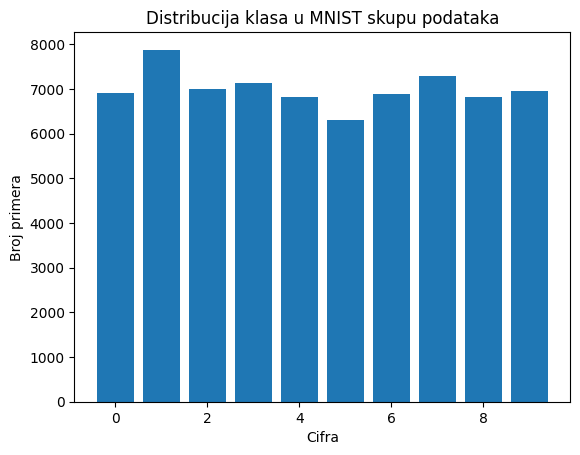

In [35]:
analyze_class_distribution()

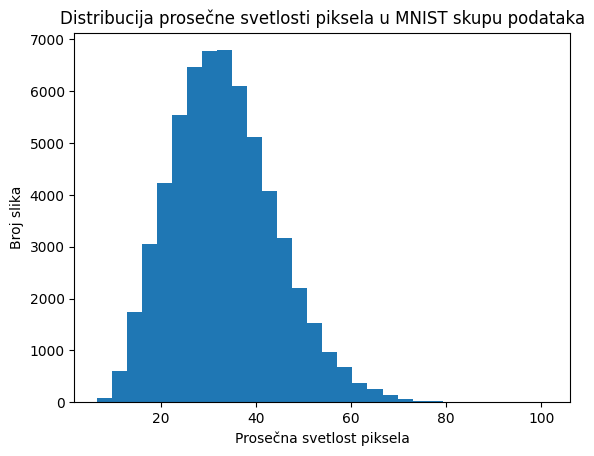

In [36]:
calc_avg_pixel_brightness()

D:\Ognjenov Folder\Fx\Master\ML\GAN-Based-Image-Data-Augmentation\synthetic_data_generation.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gan: GAN = torch.load(model_

Generated 1000 images with label 0.


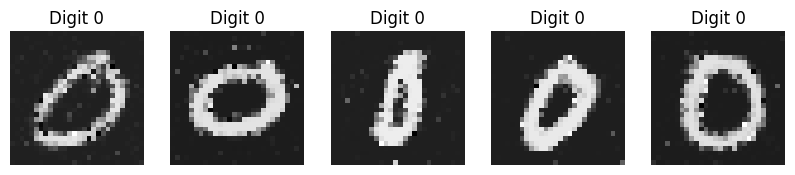

Generated 1000 images with label 1.


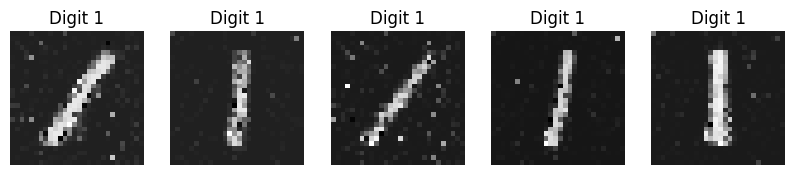

Generated 1000 images with label 2.


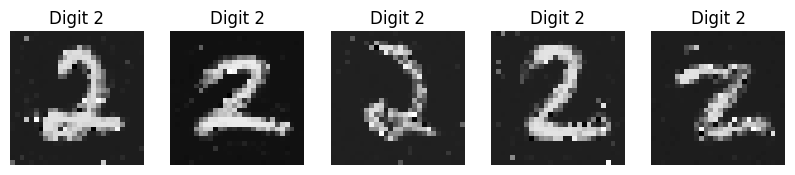

Generated 1000 images with label 3.


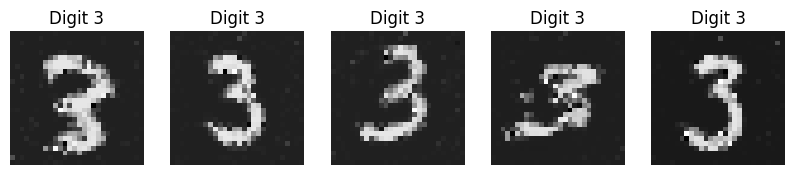

Generated 1000 images with label 4.


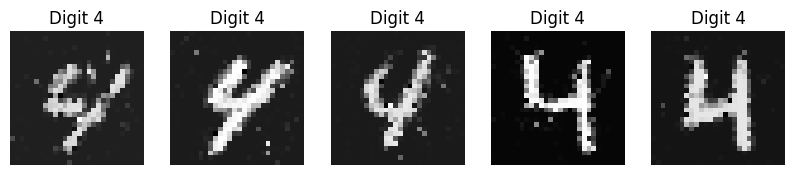

Generated 1000 images with label 5.


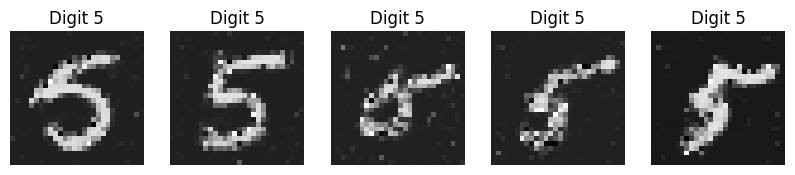

Generated 1000 images with label 6.


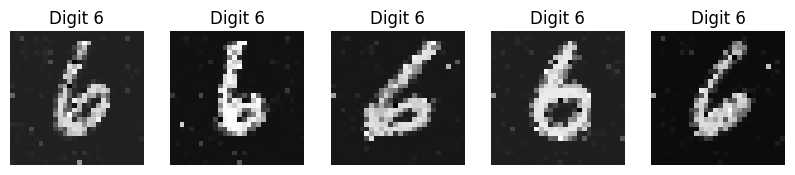

Generated 1000 images with label 7.


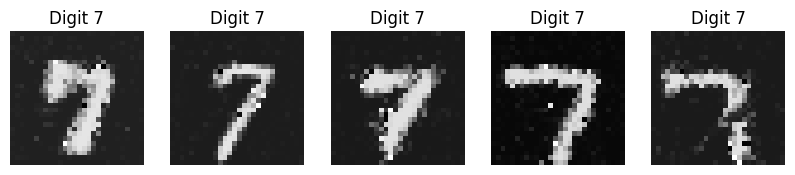

Generated 1000 images with label 8.


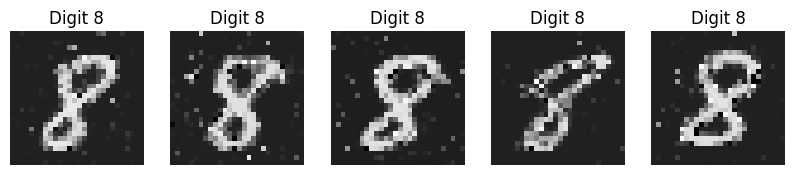

Generated 1000 images with label 9.


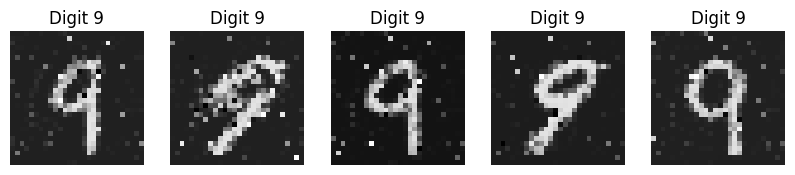

Training classifier for -1 ratio of custom data and MNIST data.
Best classifier accuracy: 0.7989000082015991.
Training classifier for 0 ratio of custom data and MNIST data.
Best classifier accuracy: 0.9506000280380249.
Training classifier for 0.25 ratio of custom data and MNIST data.
Best classifier accuracy: 0.8490999937057495.
Training classifier for 0.5 ratio of custom data and MNIST data.
Best classifier accuracy: 0.8537999987602234.
Training classifier for 1 ratio of custom data and MNIST data.
Best classifier accuracy: 0.8791000247001648.
Training classifier for 2 ratio of custom data and MNIST data.
Best classifier accuracy: 0.8812000155448914.
Training classifier for 4 ratio of custom data and MNIST data.
Best classifier accuracy: 0.8819000124931335.


C:\Users\Ognjen\AppData\Local\Temp\ipykernel_7824\3157074395.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  custom_data_ratios_to_classifiers[ratio] = torch.load(f'sav

In [37]:
# Generating syntetic data
images, labels = generate_synthetic_data()

# Going through the following ratios where the ratio = len(custom data) / len(mnist data)
# Ratio of -1 means that only the custom data was used
custom_data_ratios_to_classifiers = {-1: None, 0: None, 0.25: None, 0.5: None, 1: None, 2: None, 4: None}
for ratio in custom_data_ratios_to_classifiers.keys():
    print(f'Training classifier for {ratio} ratio of custom data and MNIST data.')
    # Training the classifier only if the model doesn't already exist in the saved_models folder
    if not os.path.exists(f'saved_models/classifier_{ratio}.pth'): 
        max_acc = 0
        # Training 5 models and picking the best one by the final accuracy result
        for _ in range(5):
            classifier = MNISTClassifier(lr=0.001, input_dim=784, output_dim=10, hidden_dim=300, dropout_rate=0.1)
            #train_loader, validation_loader, test_loader = classifier.load_and_preprocess_data(validation_split=0.2)
            train_loader, validation_loader, test_loader = classifier.load_and_preprocess_data(train_data=images, train_labels=labels, validation_split=0.2, custom_data_ratio=ratio)
            classifier.train_model(train_loader=train_loader, validation_loader=validation_loader, num_epochs=200)

            _, _ = classifier.evaluate_model(test_loader)
            if classifier.acc > max_acc:
                custom_data_ratios_to_classifiers[ratio] = classifier
                max_acc = classifier.acc
        # Saving the best model
        torch.save(custom_data_ratios_to_classifiers[ratio], f'saved_models/classifier_{ratio}.pth')
    else:
        # Loading the model into the dictionary if it already exists
        custom_data_ratios_to_classifiers[ratio] = torch.load(f'saved_models/classifier_{ratio}.pth')
    print(f'Best classifier accuracy: {custom_data_ratios_to_classifiers[ratio].acc}.')
    
# Below can be observed the GAN generated digits after training each GAN for 2000 epochs.
# As can be seen there are still some really poor examples like the 3rd example for the digit 5 and multiple ones that have
# less than desirable quality.


In [38]:
# Getting a test loader for a test dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,), (1,))])
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1000)

Classifier statistic for -1 of custom data.
Test Accuracy: 79.89%
F1 Score: 0.8018
Precision: 0.8464
Recall: 0.7989

Classification Report:
               precision    recall  f1-score   support

           0     0.9128    0.9510    0.9315       980
           1     0.9948    0.6714    0.8017      1135
           2     0.8597    0.8256    0.8423      1032
           3     0.6215    0.9218    0.7424      1010
           4     0.8421    0.8798    0.8606       982
           5     0.9794    0.4798    0.6441       892
           6     0.9084    0.8904    0.8993       958
           7     0.9573    0.7850    0.8626      1028
           8     0.5191    0.8912    0.6561       974
           9     0.8575    0.6858    0.7621      1009

    accuracy                         0.7989     10000
   macro avg     0.8453    0.7982    0.8003     10000
weighted avg     0.8464    0.7989    0.8018     10000



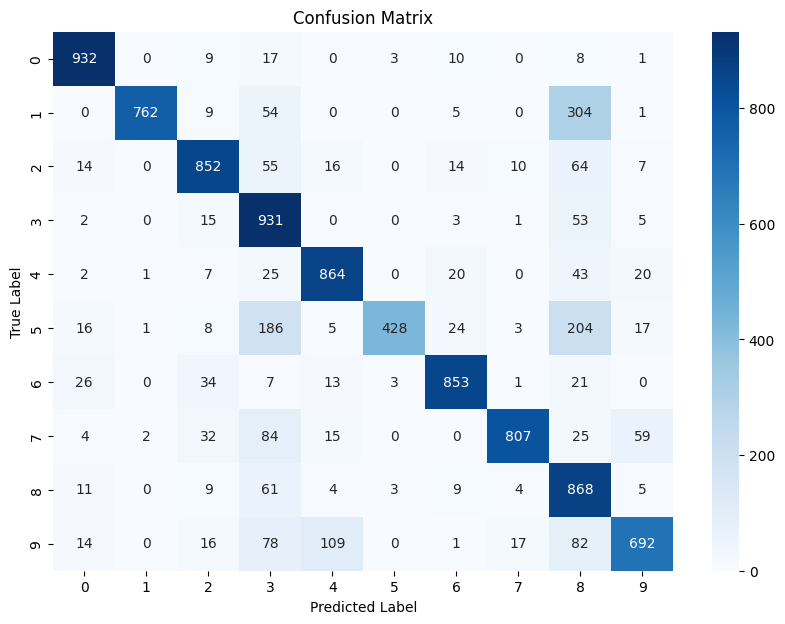

Classifier statistic for 0 of custom data.
Test Accuracy: 95.06%
F1 Score: 0.9505
Precision: 0.9506
Recall: 0.9506

Classification Report:
               precision    recall  f1-score   support

           0     0.9564    0.9857    0.9709       980
           1     0.9755    0.9841    0.9798      1135
           2     0.9528    0.9380    0.9453      1032
           3     0.9428    0.9465    0.9447      1010
           4     0.9426    0.9532    0.9478       982
           5     0.9545    0.9182    0.9360       892
           6     0.9328    0.9562    0.9443       958
           7     0.9556    0.9426    0.9491      1028
           8     0.9482    0.9405    0.9443       974
           9     0.9411    0.9346    0.9378      1009

    accuracy                         0.9506     10000
   macro avg     0.9502    0.9499    0.9500     10000
weighted avg     0.9506    0.9506    0.9505     10000



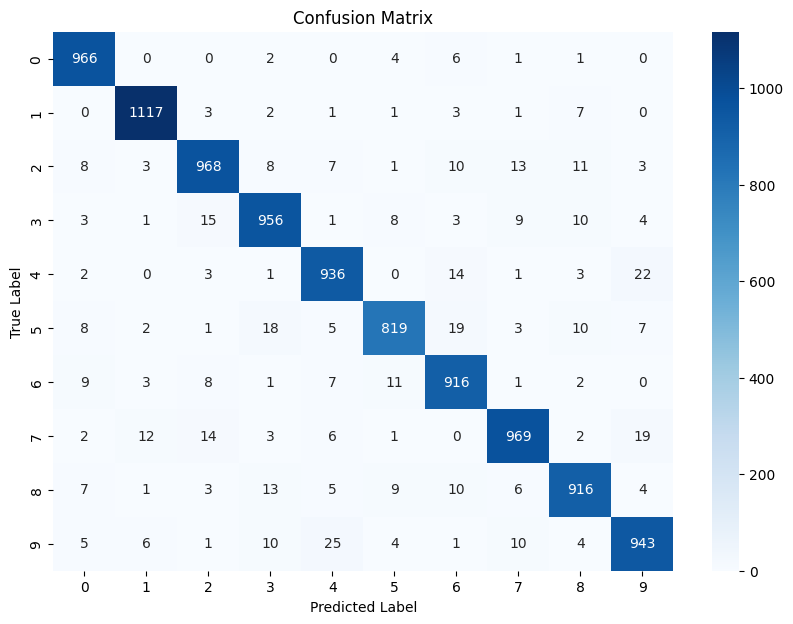

Classifier statistic for 0.25 of custom data.
Test Accuracy: 84.91%
F1 Score: 0.8502
Precision: 0.8749
Recall: 0.8491

Classification Report:
               precision    recall  f1-score   support

           0     0.9850    0.8020    0.8841       980
           1     0.9318    0.9744    0.9526      1135
           2     0.7722    0.9264    0.8423      1032
           3     0.9034    0.8238    0.8617      1010
           4     0.9383    0.8829    0.9098       982
           5     0.5962    0.9383    0.7291       892
           6     0.9683    0.7975    0.8746       958
           7     0.7885    0.9465    0.8603      1028
           8     0.9708    0.5811    0.7270       974
           9     0.8720    0.7968    0.8327      1009

    accuracy                         0.8491     10000
   macro avg     0.8726    0.8470    0.8474     10000
weighted avg     0.8749    0.8491    0.8502     10000



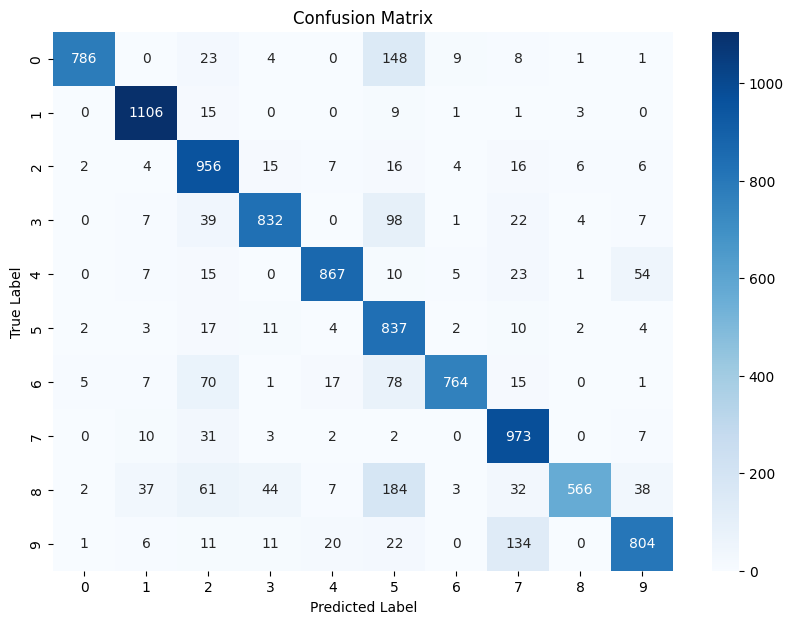

Classifier statistic for 0.5 of custom data.
Test Accuracy: 85.38%
F1 Score: 0.8535
Precision: 0.8742
Recall: 0.8538

Classification Report:
               precision    recall  f1-score   support

           0     0.9622    0.8827    0.9207       980
           1     0.9338    0.9568    0.9452      1135
           2     0.7086    0.9331    0.8055      1032
           3     0.7920    0.9050    0.8447      1010
           4     0.9531    0.8697    0.9095       982
           5     0.6761    0.9081    0.7751       892
           6     0.9634    0.7965    0.8720       958
           7     0.8443    0.9125    0.8770      1028
           8     0.9754    0.5688    0.7185       974
           9     0.9198    0.7839    0.8464      1009

    accuracy                         0.8538     10000
   macro avg     0.8729    0.8517    0.8515     10000
weighted avg     0.8742    0.8538    0.8535     10000



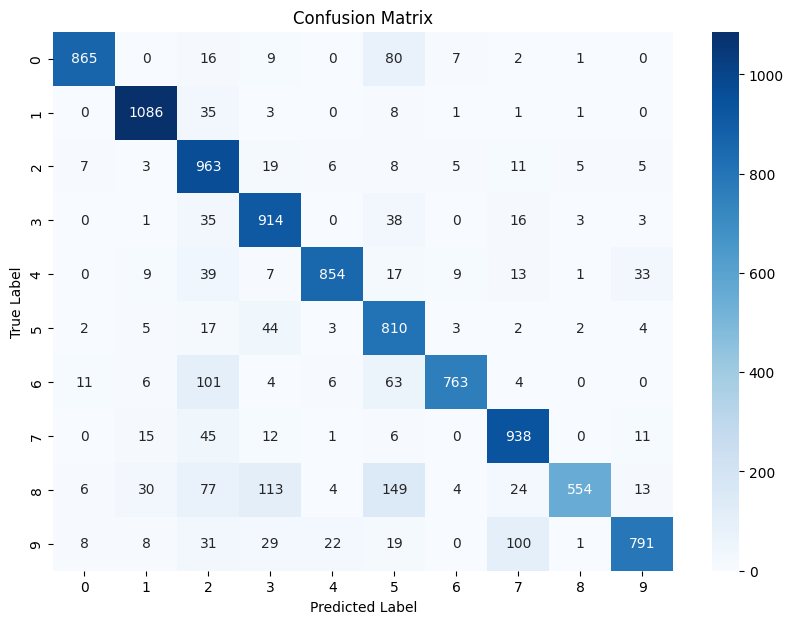

Classifier statistic for 1 of custom data.
Test Accuracy: 87.91%
F1 Score: 0.8803
Precision: 0.8898
Recall: 0.8791

Classification Report:
               precision    recall  f1-score   support

           0     0.9807    0.8316    0.9001       980
           1     0.9322    0.9815    0.9562      1135
           2     0.8380    0.9070    0.8711      1032
           3     0.8768    0.8812    0.8790      1010
           4     0.9067    0.9104    0.9085       982
           5     0.6705    0.9238    0.7770       892
           6     0.9484    0.8445    0.8934       958
           7     0.8809    0.9212    0.9006      1028
           8     0.9400    0.7556    0.8378       974
           9     0.9017    0.8186    0.8582      1009

    accuracy                         0.8791     10000
   macro avg     0.8876    0.8775    0.8782     10000
weighted avg     0.8898    0.8791    0.8803     10000



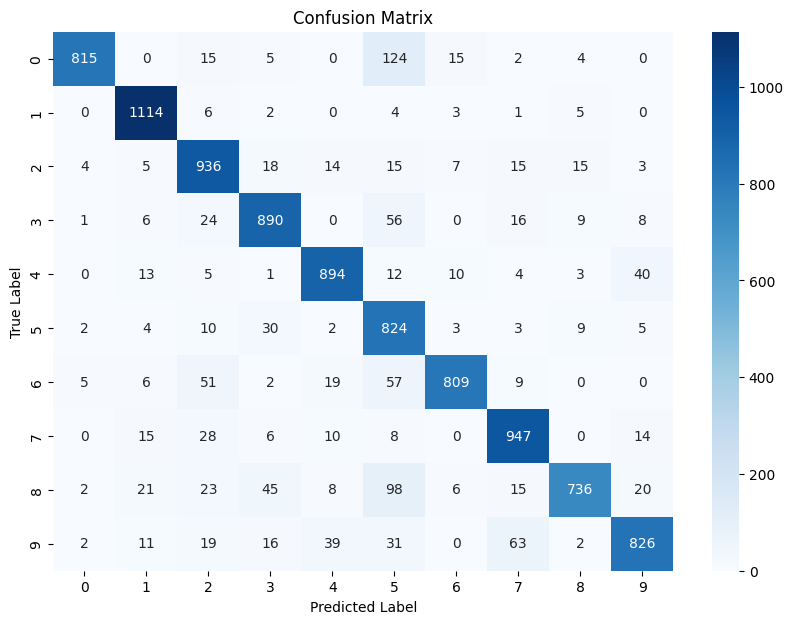

Classifier statistic for 2 of custom data.
Test Accuracy: 88.12%
F1 Score: 0.8819
Precision: 0.8864
Recall: 0.8812

Classification Report:
               precision    recall  f1-score   support

           0     0.9635    0.8878    0.9241       980
           1     0.9619    0.9559    0.9589      1135
           2     0.8021    0.8953    0.8462      1032
           3     0.8358    0.8970    0.8653      1010
           4     0.9123    0.9002    0.9062       982
           5     0.7557    0.8980    0.8207       892
           6     0.9571    0.8392    0.8943       958
           7     0.8773    0.9115    0.8941      1028
           8     0.8883    0.8080    0.8462       974
           9     0.8945    0.8067    0.8484      1009

    accuracy                         0.8812     10000
   macro avg     0.8848    0.8800    0.8804     10000
weighted avg     0.8864    0.8812    0.8819     10000



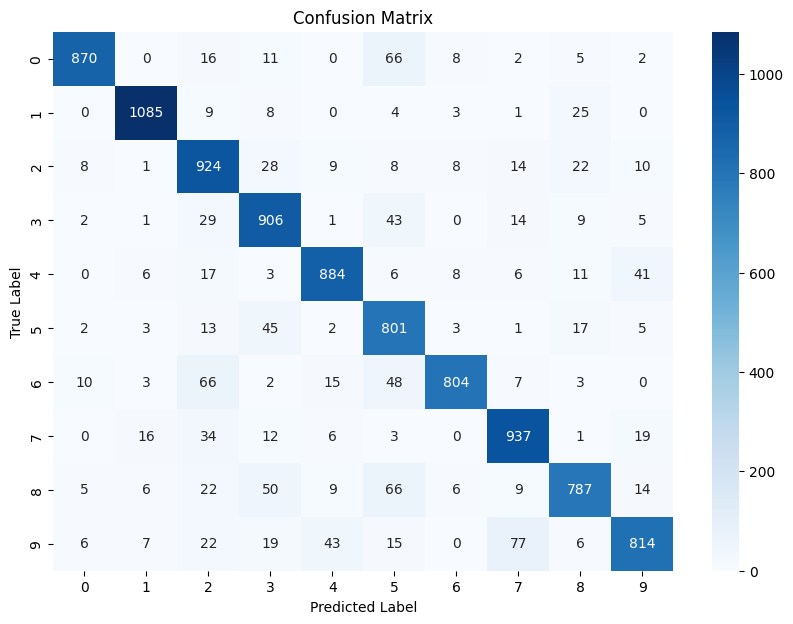

Classifier statistic for 4 of custom data.
Test Accuracy: 88.19%
F1 Score: 0.8816
Precision: 0.8836
Recall: 0.8819

Classification Report:
               precision    recall  f1-score   support

           0     0.9389    0.9561    0.9474       980
           1     0.9348    0.9727    0.9534      1135
           2     0.8785    0.8614    0.8699      1032
           3     0.8740    0.8723    0.8731      1010
           4     0.9207    0.8635    0.8912       982
           5     0.8339    0.8554    0.8445       892
           6     0.9443    0.8852    0.9138       958
           7     0.8020    0.9416    0.8662      1028
           8     0.8794    0.7864    0.8304       974
           9     0.8241    0.8077    0.8158      1009

    accuracy                         0.8819     10000
   macro avg     0.8831    0.8802    0.8806     10000
weighted avg     0.8836    0.8819    0.8816     10000



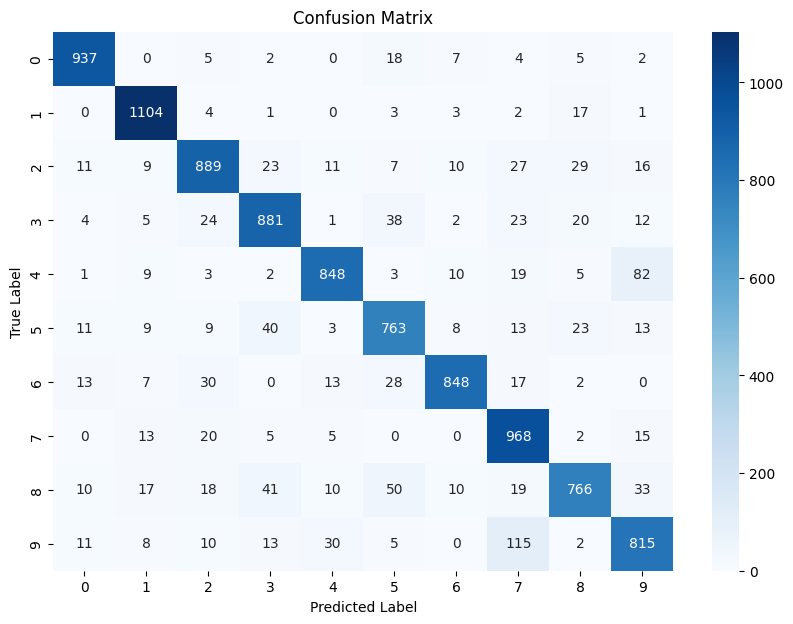

In [39]:
# Going through all of the trained classifiers and printing their statistics and the confusion matrix
for ratio, classifier in custom_data_ratios_to_classifiers.items():
    print(f'Classifier statistic for {ratio} of custom data.')
    true_labels, pred_labels = classifier.evaluate_model(test_loader)
    classifier.plot_confusion_matrix(true_labels, pred_labels)
    
# Below are listed all of the models and the calculated statistics alongside the confusion matrices.
# One thing to notice is that the models are having the most trouble with the digit 5. An interesting thing to note is that
# the third model (ratio=0.25) actually has better success with the digit 5 than the model trained exclusively on real data
# in this scenario.

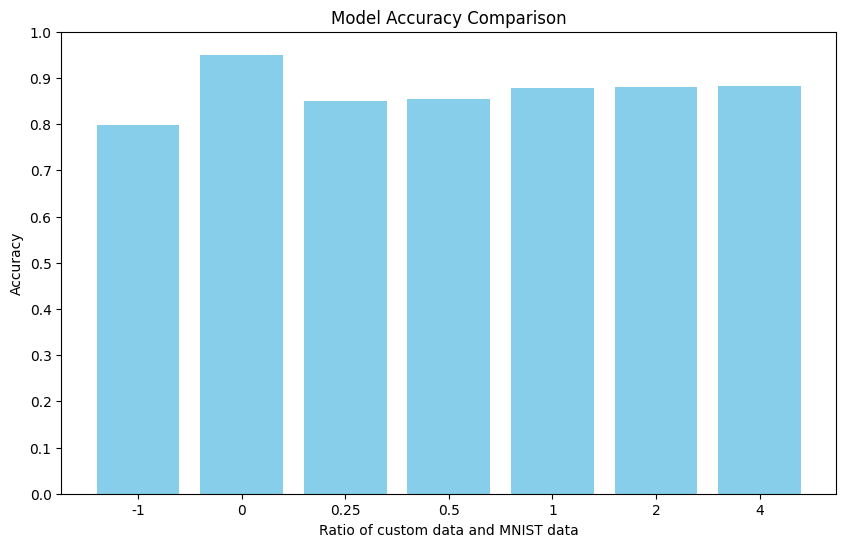

In [40]:
# Plotting the comparison graph
ratios = [str(ratio) for ratio in custom_data_ratios_to_classifiers.keys()]
accs = [model.acc for model in custom_data_ratios_to_classifiers.values()]

plt.figure(figsize=(10, 6))
plt.bar(ratios, accs, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Ratio of custom data and MNIST data')
plt.ylabel('Accuracy')

plt.yticks(np.arange(0, max(accs) + 0.1, 0.1))

plt.show()

# As can be seen on the graph, the best results are achived with pure mnist dataset for the length of the dataset being 10000.
# As can be observed in the graph below while looking at the 0.25, 0.5, 1, 2 and 4 ratio models, 
# the accuracy of the model increases when the amount of synthetic data increases.
# This leads us to a conclusion that the synthetic data has the possibility to improve the accuracy of the model when combined
# with the real data.
# Synthetic data can, depending on quality, successfully expand the data set, allowing the model to reach higher accuracies, but
# for this to be viable the quality of the generated data needs to be sufficient.